<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Python_18_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D1%8B_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
# 1 Load the dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# 2 Look for the Nan-values, dataframe hasn`t Nan values
data.isna().sum()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Text(0.5, 1.0, 'amount of fraudly and honest transactions')

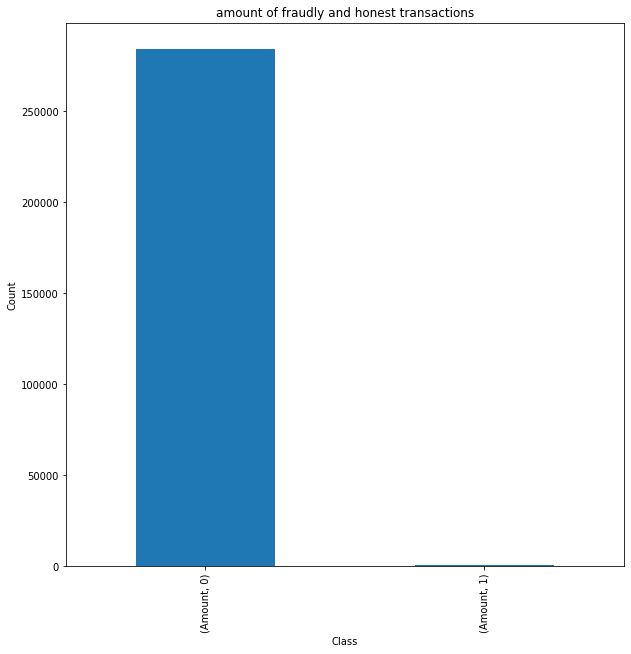

In [11]:
# 3 Make figure barplot for two classess, target is 'Class'. Calculate amount of values in fraudly and honest transactions

fraud = data[data['Class']==1]
honest = data[data['Class']==0]

len(fraud) # 492 transactions
len(honest) # 284315 transactions

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
transactions = data.groupby('Class').count()
transactions = transactions.filter(items = ['Class', 'Amount'])
transactions.unstack().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('amount of fraudly and honest transactions')

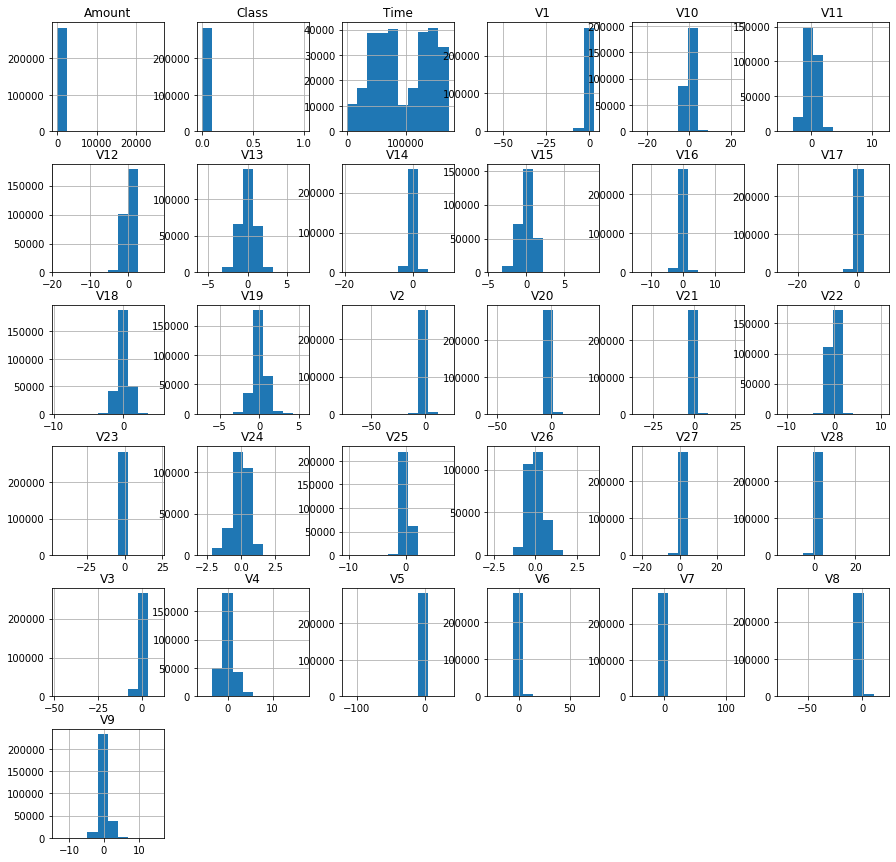

In [12]:
# 4 How much money was used in fraudly and honest transactions? Built a hist on column 'Amount' at column 'Class' by two diff
# data: fraudly and honest

sum(fraud['Amount']) # 60127.96
sum(honest['Amount']) # 25102462.03

data.hist(figsize=(15,15))
plt.show()

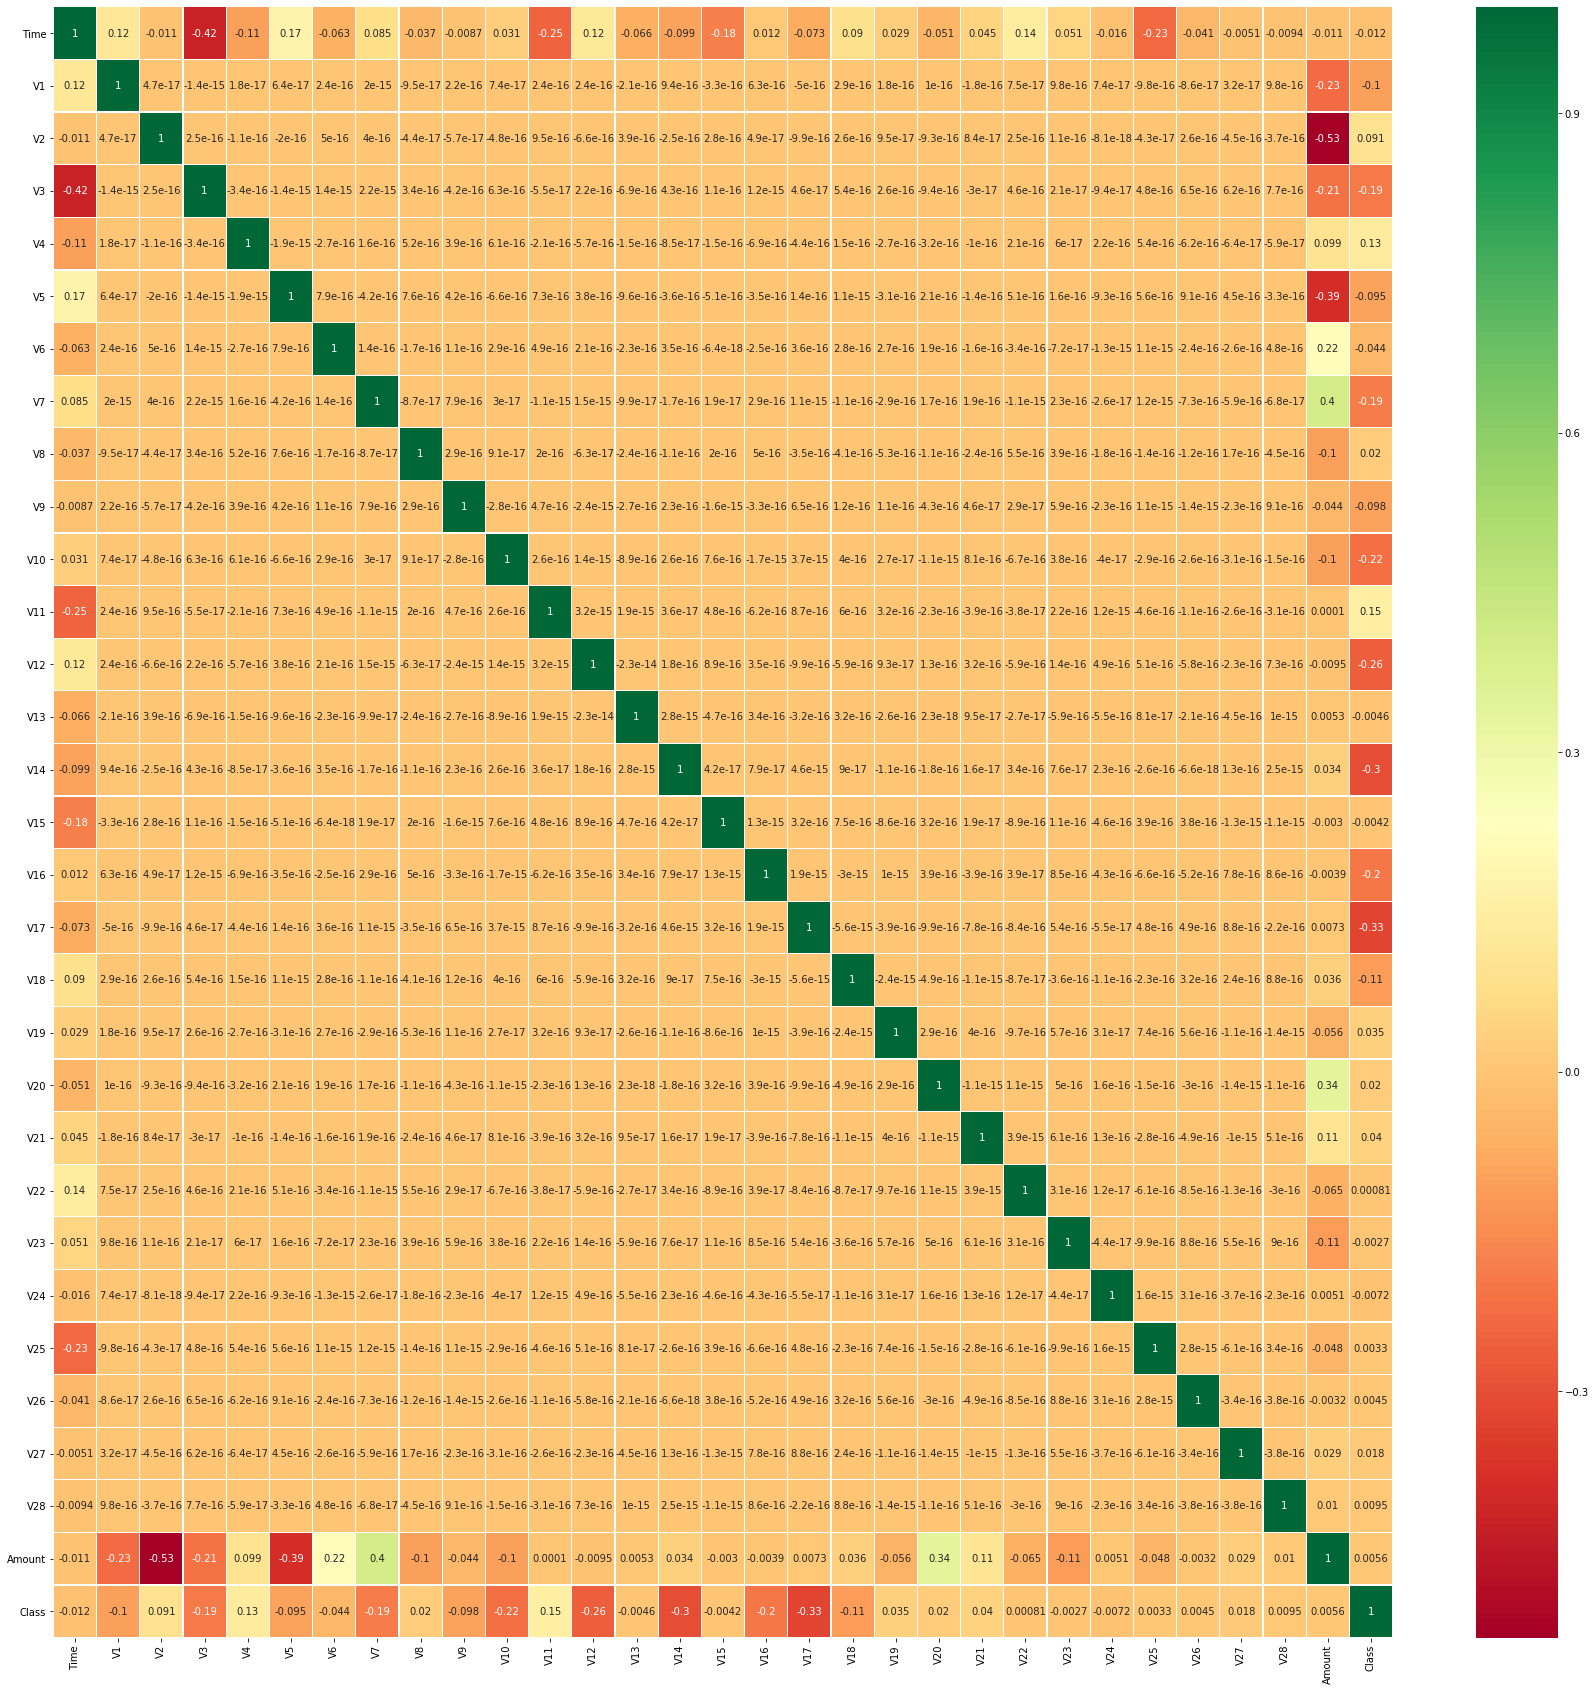

In [13]:
# 6 Make a corellation matrix for all values
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [0]:
# 7 Take all values from dataframe for prediction. Divide them by training and test data. Build logistic regression.
# Make classification report. Then normalize data. Build logistic regression again. Make classification report
# Are there any improvements?
x = data.drop('Class', axis=1)
y = data.Class

In [0]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)
model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [16]:
model.score(x, y)

0.9990519895929524

In [17]:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.59      0.71       132

    accuracy                           1.00     71202
   macro avg       0.94      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [0]:
headers = list(data.columns.values)

In [19]:
# let`s make a data normalization
from sklearn import preprocessing

min_max_proc = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_proc = min_max_proc.fit_transform(data)
data_norm = pd.DataFrame(np_proc)
data_norm.columns = headers
data_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,0.021201,-0.495031,0.361815,-0.256819,0.271181,-0.107833,-0.131215,0.474345,0.310132,0.189726,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,0.010535,-0.237625,0.488683,-0.027620,0.282438,-0.232321,-0.071790,0.455588,0.281362,0.103861,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,0.026036,-0.355156,0.413367,0.007708,0.280947,0.023394,-0.285115,0.526762,0.289891,-0.226634,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,0.015170,-0.456365,0.421820,-0.024731,0.272744,-0.421751,-0.168693,0.422506,0.576983,-0.065885,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,0.048606,-0.527291,0.448955,0.105018,0.216812,-0.301162,-0.130010,0.448485,0.301330,0.252121,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [0]:
# And make logistic regression again with normalized data

In [0]:
x_norm = data.drop('Class', axis=1)
y_norm = data.Class

In [0]:
from sklearn.linear_model import LogisticRegression

x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_norm, y_norm, test_size=0.25, random_state=27)
model = LogisticRegression(solver='liblinear').fit(x_norm_train, y_norm_train)

In [22]:
model.score(x_norm_train, y_norm_train)

0.9990356030991784

In [23]:
# Conclusion - nothing changes
from sklearn.metrics import classification_report

model_pred = model.predict(x_norm_test)

print(classification_report(y_norm_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.89      0.59      0.71       132

    accuracy                           1.00     71202
   macro avg       0.94      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [24]:
# 8 make model RandomForestClassifier and compare results with logistic regression. Why differenet results? Training 
# and testing data take the same with logistic regression

from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=100)
model_forest.fit(x_norm_train, y_norm_train)

model__forest_pred = model_forest.predict(x_norm_test)

print(classification_report(y_norm_test, model__forest_pred))
# Conclusion - result is better mainly with fraud transaction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.98      0.81      0.89       132

    accuracy                           1.00     71202
   macro avg       0.99      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [0]:
# Balance classes using up-sampling (we don’t change test data, only training data). 
# Write a logistic regression on the generated data and compare the result with the models obtained in steps 7 and 8. As test data, 
# we use the same dataset obtained in step 7

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0)
ros.fit(x_norm_train, y_norm_train)
x_resampled, y_resampled = ros.fit_sample(x_norm_train, y_norm_train)

In [0]:
model_resampled = LogisticRegression(solver='liblinear').fit(x_resampled, y_resampled)

In [35]:
model_resampled_pred = model_resampled.predict(x_test)

print(classification_report(y_test, model_resampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71070
           1       0.08      0.86      0.14       132

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202

